# Weather Data EDA by Qiaoying Zhang

In [1]:
import numpy as np
import pandas as pd

In [2]:
report = pd.read_csv('Monthly_weather_report.csv')
regions = pd.read_csv('US_weather_regions.csv')
result = pd.merge(report, regions, how='left', on='id')

result.head()

,Unnamed: 0.1,Unnamed: 0,id,Time,Monthly Average Temperature,Monthly Maximum Temperature,Monthly Minimum Temperature,Monthly Total Precepitation,Monthly Average Windspeed,Monthly Average Air Pressure,...,latitude,longitude,elevation,timezone,hourly_start,hourly_end,daily_start,daily_end,monthly_start,monthly_end
0,0,0,70326,1942-02-01,1.0,NaN,NaN,42.6,NaN,NaN,...,58.6833,-156.65,17.0,America/Juneau,1942-01-10,2023-12-13,1942-01-12,2023-12-10,1942-01-01,2022-01-01
1,1,1,70326,1942-03-01,-5.0,-0.4,-12.4,12.6,NaN,NaN,...,58.6833,-156.65,17.0,America/Juneau,1942-01-10,2023-12-13,1942-01-12,2023-12-10,1942-01-01,2022-01-01
2,2,2,70326,1942-04-01,3.0,6.6,-2.2,35.6,NaN,NaN,...,58.6833,-156.65,17.0,America/Juneau,1942-01-10,2023-12-13,1942-01-12,2023-12-10,1942-01-01,2022-01-01
3,3,3,70326,1942-05-01,9.3,14.2,2.5,28.8,NaN,NaN,...,58.6833,-156.65,17.0,America/Juneau,1942-01-10,2023-12-13,1942-01-12,2023-12-10,1942-01-01,2022-01-01
4,4,4,70326,1942-06-01,10.8,15.6,4.9,65.8,15.2,1010.0,...,58.6833,-156.65,17.0,America/Juneau,1942-01-10,2023-12-13,1942-01-12,2023-12-10,1942-01-01,2022-01-01


In [3]:
weather = result[['Time', 'Monthly Average Temperature', 'Monthly Total Precepitation', 
                  'Monthly Average Windspeed', 'region']]

weather.head()

,Time,Monthly Average Temperature,Monthly Total Precepitation,Monthly Average Windspeed,region
0,1942-02-01,1.0,42.6,NaN,AK
1,1942-03-01,-5.0,12.6,NaN,AK
2,1942-04-01,3.0,35.6,NaN,AK
3,1942-05-01,9.3,28.8,NaN,AK
4,1942-06-01,10.8,65.8,15.2,AK


In [4]:
weather['Year'] = pd.to_datetime(weather['Time']).dt.year
weather['Month'] = pd.to_datetime(weather['Time']).dt.month
weather = weather.drop('Time', axis=1)

weather.head()

C:\Users\qiaoy\AppData\Local\Temp\ipykernel_15920\636212524.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather['Year'] = pd.to_datetime(weather['Time']).dt.year
C:\Users\qiaoy\AppData\Local\Temp\ipykernel_15920\636212524.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather['Month'] = pd.to_datetime(weather['Time']).dt.month


,Monthly Average Temperature,Monthly Total Precepitation,Monthly Average Windspeed,region,Year,Month
0,1.0,42.6,NaN,AK,1942,2
1,-5.0,12.6,NaN,AK,1942,3
2,3.0,35.6,NaN,AK,1942,4
3,9.3,28.8,NaN,AK,1942,5
4,10.8,65.8,15.2,AK,1942,6


In [5]:
section = weather[weather['Year'] >= 1996]

section.head()

,Monthly Average Temperature,Monthly Total Precepitation,Monthly Average Windspeed,region,Year,Month
647,-9.3,18.0,14.5,AK,1996,1
648,-10.4,19.0,18.5,AK,1996,2
649,0.2,10.0,14.6,AK,1996,3
650,1.6,22.0,16.9,AK,1996,4
651,8.1,21.0,13.6,AK,1996,5


In [6]:
# section[section['Monthly Average Temperature'].isnull() & section['Monthly Maximum Temperature'].isnull() & section['Monthly Minimum Temperature'].isnull()]

In [7]:
section.info()

<class 'pandas.core.frame.DataFrame'>
Index: 288175 entries, 647 to 577926
Data columns (total 6 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Monthly Average Temperature  175863 non-null  float64
 1   Monthly Total Precepitation  144086 non-null  float64
 2   Monthly Average Windspeed    160292 non-null  float64
 3   region                       287573 non-null  object 
 4   Year                         288175 non-null  int32  
 5   Month                        288175 non-null  int32  
dtypes: float64(3), int32(2), object(1)
memory usage: 13.2+ MB


In [8]:
years = list(section['Year'].unique())
years

[1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021,
 2022]

In [9]:
section.nunique()

Monthly Average Temperature     686
Monthly Total Precepitation    3955
Monthly Average Windspeed       357
region                           53
Year                             27
Month                            12
dtype: int64

In [10]:
# section = section.sort_values(by=['region', 'Year', 'Month'])

# section.head()

In [11]:
# names = section['name'].unique()
# id = list(range(len(names)))
# dict = {'name': names, 'id': id} 
# name_df = pd.DataFrame(dict)

# name_df.head()

In [12]:
regions = list(section['region'].unique())
regions

['AK',
 'MN',
 'IA',
 'NH',
 'CO',
 'NY',
 'MS',
 nan,
 'AZ',
 'AR',
 'VA',
 'MD',
 'PA',
 'MI',
 'AL',
 'IL',
 'OH',
 'NE',
 'GA',
 'ND',
 'MT',
 'WY',
 'FL',
 'WI',
 'TX',
 'CT',
 'NM',
 'ME',
 'OR',
 'CA',
 'TN',
 'WV',
 'SD',
 'MO',
 'OK',
 'NV',
 'NC',
 'SC',
 'HI',
 'LA',
 'IN',
 'VT',
 'KY',
 'MA',
 'WA',
 'ID',
 'KS',
 'NJ',
 'UT',
 'WQ',
 'DE',
 'RI',
 'RO',
 'DC']

In [13]:
# encode regions
regions = list(section['region'].unique())
region_id = list(range(len(regions)))
dict = {'region': regions, 'Region_id': region_id}
region_df = pd.DataFrame(dict)
region_df.to_csv('Region_ID.csv', index=False)  

region_df.head()

,region,Region_id
0,AK,0
1,MN,1
2,IA,2
3,NH,3
4,CO,4


In [14]:
# extracted_df = pd.merge(section, name_df, how='left', on='name')
extracted_df = pd.merge(section, region_df, how='left', on='region')

extracted_df.head()

,Monthly Average Temperature,Monthly Total Precepitation,Monthly Average Windspeed,region,Year,Month,Region_id
0,-9.3,18.0,14.5,AK,1996,1,0
1,-10.4,19.0,18.5,AK,1996,2,0
2,0.2,10.0,14.6,AK,1996,3,0
3,1.6,22.0,16.9,AK,1996,4,0
4,8.1,21.0,13.6,AK,1996,5,0


In [15]:
start = years[0]
quarter = 4
filtered_df = pd.DataFrame()

for i in range(len(years)):
    for j in range(len(regions)):
        for k in range(quarter):
            # aggregate 3-months as one quarter
            temp = extracted_df[(extracted_df.Year==i+start) & (extracted_df.Region_id==j) & \
            ((extracted_df.Month==k+1) | (extracted_df.Month==k+2) | (extracted_df.Month==k+3))]\
            ['Monthly Average Temperature']
            prec = extracted_df[(extracted_df.Year==i+start) & (extracted_df.Region_id==j) & \
            ((extracted_df.Month==k+1) | (extracted_df.Month==k+2) | (extracted_df.Month==k+3))]\
            ['Monthly Total Precepitation']
            wind = extracted_df[(extracted_df.Year==i+start) & (extracted_df.Region_id==j) & \
            ((extracted_df.Month==k+1) | (extracted_df.Month==k+2) | (extracted_df.Month==k+3))]\
            ['Monthly Average Windspeed']

            # create and append new dataframe row with non-null average data based on year, quarter, region
            row = pd.DataFrame([{'Year':i+start, 'quarter':k+1, 'region':j, 'temperature':np.nanmean(temp), 
                                 'precepitation':np.nanmean(prec), 'windspeed':np.nanmean(wind)}])
            filtered_df = pd.concat([filtered_df, row])

filtered_df.head()

C:\Users\qiaoy\AppData\Local\Temp\ipykernel_15920\1370612446.py:20: RuntimeWarning: Mean of empty slice
  row = pd.DataFrame([{'Year':i+start, 'quarter':k+1, 'region':j, 'temperature':np.nanmean(temp),
C:\Users\qiaoy\AppData\Local\Temp\ipykernel_15920\1370612446.py:21: RuntimeWarning: Mean of empty slice
  'precepitation':np.nanmean(prec), 'windspeed':np.nanmean(wind)}])


,Year,quarter,region,temperature,precepitation,windspeed
0,1996,1,0,-9.268000,65.571910,14.678571
0,1996,2,0,-5.317778,68.257143,15.390909
0,1996,3,0,1.288636,44.264516,14.491071
0,1996,4,0,6.058140,50.244086,14.567273
0,1996,1,1,-10.658333,31.692308,18.275000


In [16]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5832 entries, 0 to 0
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           5832 non-null   int32  
 1   quarter        5832 non-null   int64  
 2   region         5832 non-null   int64  
 3   temperature    5438 non-null   float64
 4   precepitation  5549 non-null   float64
 5   windspeed      5418 non-null   float64
dtypes: float64(3), int32(1), int64(2)
memory usage: 296.2 KB


In [17]:
empty = list(np.unique(np.where(pd.isnull(filtered_df))[0]))
filtered_df = filtered_df.reset_index(drop=True)

for idx in empty:
    d = filtered_df.iloc[idx]
    r = d.region
    q = d.quarter

    # make sure to only update null entries by average data based on region and quarter
    if pd.isnull(d.temperature):
        filtered_df.at[idx, 'temperature'] = np.nanmean(filtered_df[(filtered_df.region==r) & \
                                                       (filtered_df.quarter==q)].temperature)
    if pd.isnull(d.precepitation):
        filtered_df.at[idx, 'precepitation'] = np.nanmean(filtered_df[(filtered_df.region==r) & \
                                                       (filtered_df.quarter==q)].precepitation)
    if pd.isnull(d.windspeed):
        filtered_df.at[idx, 'windspeed'] = np.nanmean(filtered_df[(filtered_df.region==r) & \
                                                       (filtered_df.quarter==q)].windspeed)

filtered_df.info()

C:\Users\qiaoy\AppData\Local\Temp\ipykernel_15920\94122680.py:17: RuntimeWarning: Mean of empty slice
  filtered_df.at[idx, 'windspeed'] = np.nanmean(filtered_df[(filtered_df.region==r) & \


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5832 entries, 0 to 5831
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           5832 non-null   int32  
 1   quarter        5832 non-null   int64  
 2   region         5832 non-null   int64  
 3   temperature    5832 non-null   float64
 4   precepitation  5832 non-null   float64
 5   windspeed      5724 non-null   float64
dtypes: float64(3), int32(1), int64(2)
memory usage: 250.7 KB


In [18]:
empty = list(np.unique(np.where(pd.isnull(filtered_df))[0]))

filtered_df.iloc[empty].region.unique()

array([49], dtype=int64)

In [19]:
# Wake Island - military based Army Airfield Airport
regions[49]

'WQ'

In [20]:
# drop fields from 'Wake Island' and null region (unrelatable)
filtered_df.drop(filtered_df[filtered_df.region==49].index, inplace=True)
filtered_df.drop(filtered_df[filtered_df.region==regions.index(np.nan)].index, inplace=True)
filtered_df.to_csv('Domestic_weather_cleaned.csv', index=False)

filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5616 entries, 0 to 5831
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           5616 non-null   int32  
 1   quarter        5616 non-null   int64  
 2   region         5616 non-null   int64  
 3   temperature    5616 non-null   float64
 4   precepitation  5616 non-null   float64
 5   windspeed      5616 non-null   float64
dtypes: float64(3), int32(1), int64(2)
memory usage: 285.2 KB


In [21]:
# temp_lst = []
# prec_lst = []
# wind_lst = []
# pres_lst = []
# df = pd.DataFrame()

# for i in range(len(extracted_df)):
#     s = new.iloc[i]
#     temp_lst.append(0 if s['Monthly Average Temperature']==np.nan else s['Monthly Average Temperature'])
#     prec_lst.append(0 if s['Monthly Total Precepitation']==np.nan else s['Monthly Total Precepitation'])
#     wind_lst.append(0 if s['Monthly Average Windspeed']==np.nan else s['Monthly Average Windspeed'])
#     pres_lst.append(0 if s['Monthly Average Air Pressure']==np.nan else s['Monthly Average Air Pressure'])
    
#     if s.Month % 3 == 0:
#         temp_null = temp_lst.count(0)
#         temp = np.nan if temp_null==len(temp_lst) else sum(temp_lst) / (len(temp_lst)-temp_null)
#         prec_null = prec_lst.count(0)
#         prec = np.nan if prec_null==len(prec_lst) else sum(prec_lst) / (len(prec_lst)-prec_null)
#         wind_null = wind_lst.count(0)
#         wind = np.nan if wind_null==len(wind_lst) else sum(wind_lst) / (len(wind_lst)-wind_null)
#         pres_null = pres_lst.count(0)
#         pres = np.nan if pres_null==len(pres_lst) else sum(pres_lst) / (len(pres_lst)-pres_null)
#         row = pd.DataFrame([{'airport_id':s.id, 'airport':s['name'], 'state':s.state, 'year':s.Year, 'quarter':int(s.Month/3), 
#                         'temperature':temp, 'precepitation':prec, 'windspeed':wind, 'air_pressure':pres}])
#         df = pd.concat([df, row])
        
#         # reset list
#         temp_lst = []
#         prec_lst = []
#         wind_lst = []
#         pres_lst = [] 
        
# df.head()

In [22]:
# data = df[['airport_id', 'state', 'year', 'quarter', 'temperature', 'precepitation', 'windspeed', 'air_pressure']]
# data = data.reset_index(drop=True)

# data.head()

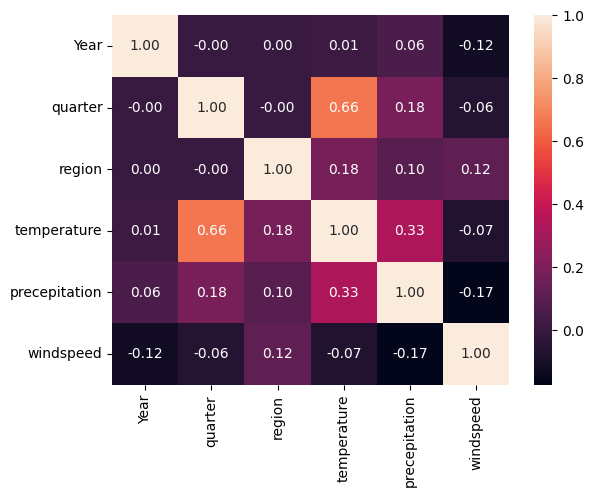

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

hm = sns.heatmap(filtered_df.corr(), annot=True, fmt=".2f")

<Axes: ylabel='Count'>

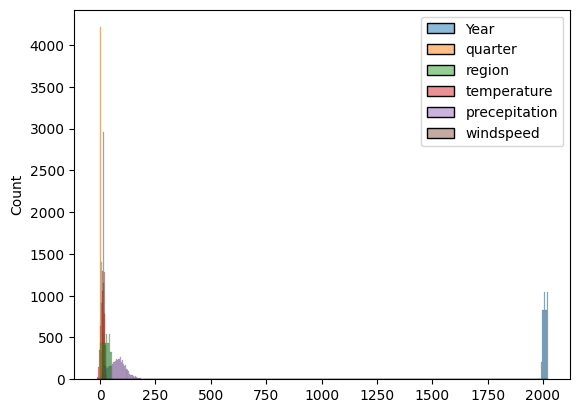

In [24]:
sns.histplot(filtered_df)

<Axes: xlabel='region', ylabel='temperature'>

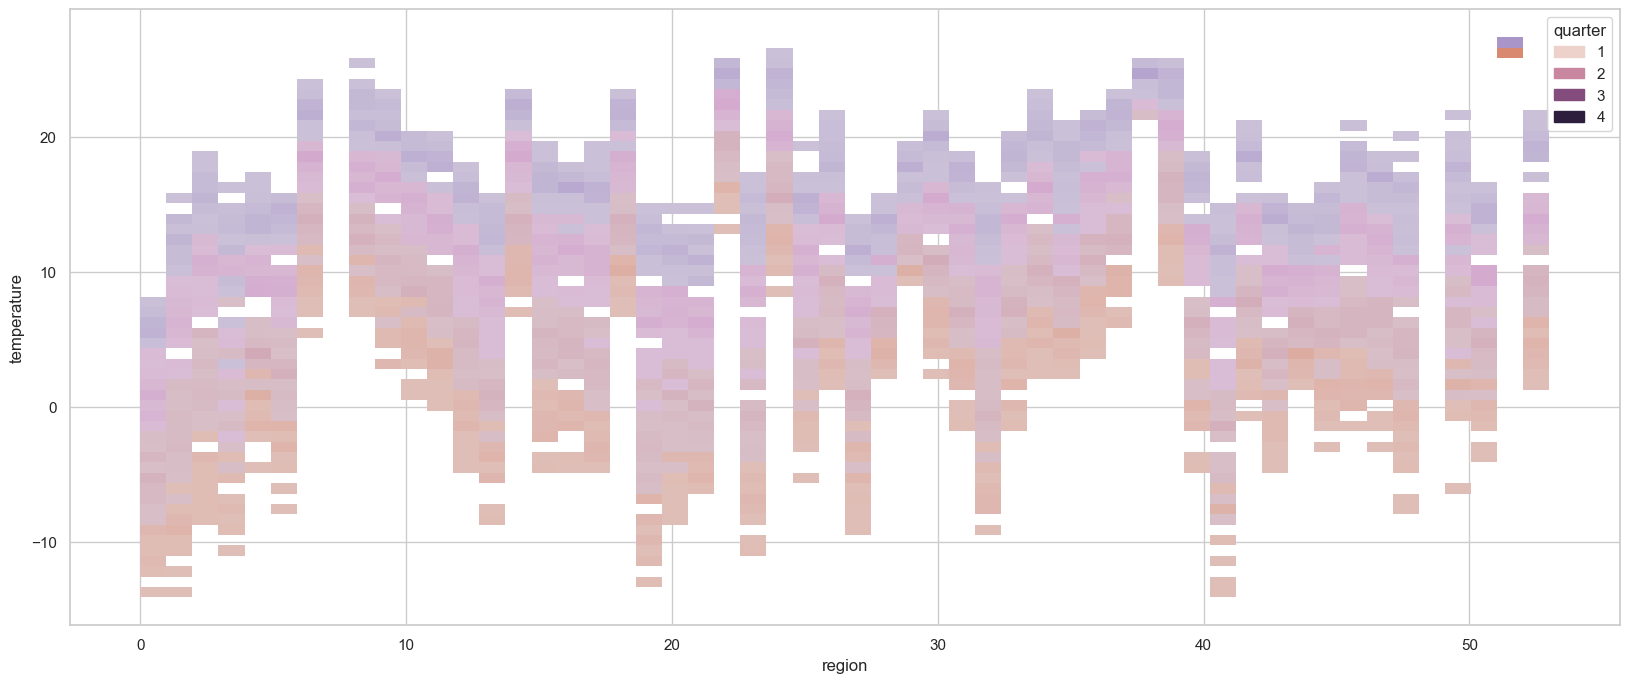

In [25]:
sns.set(rc={'figure.figsize':(20,8)})
sns.set_style('whitegrid')
sns.histplot(filtered_df, x='region', y='temperature', hue='quarter', bins=len(regions))

In [26]:
# Rota - Island in the Northern Mariana Islands
# Rota Island can be omitted, probably not in the tiket pricing dataset
regions[52]

'RO'

In [36]:
regions[1]

'MN'

In [27]:
# sns.scatterplot(data, x='air_pressure', y='state', s=10, color='blue', alpha=0.25)

<Axes: xlabel='Year', ylabel='temperature'>

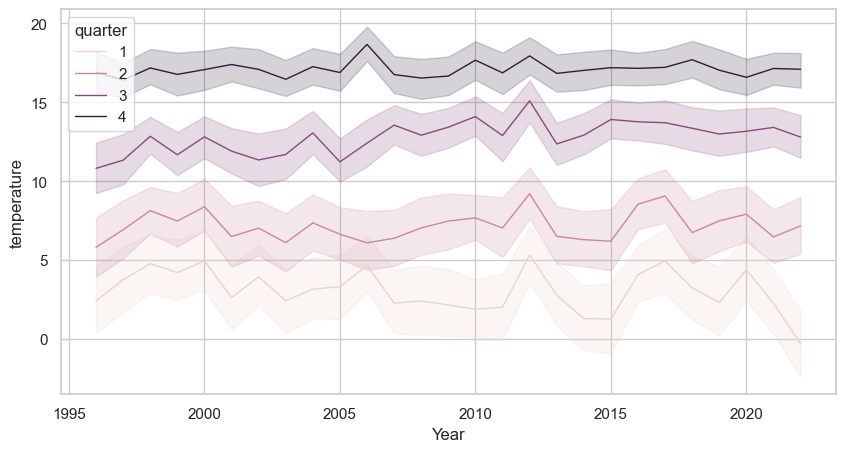

In [28]:
sns.set(rc={'figure.figsize':(10,5)})
sns.set_style('whitegrid')
sns.lineplot(filtered_df, x='Year', y='temperature', hue='quarter', lw=1)

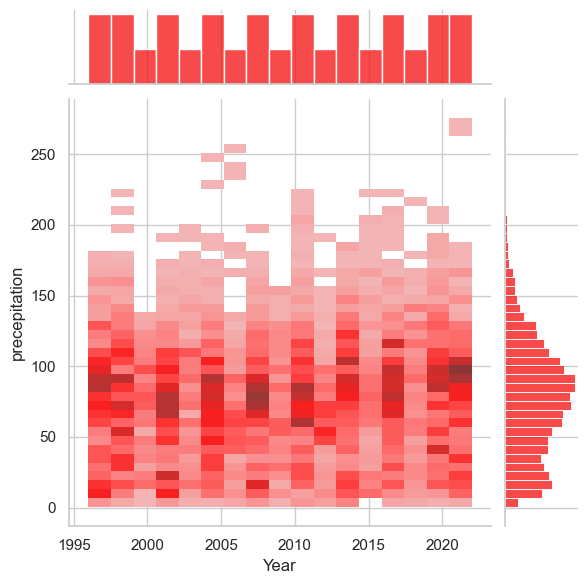

In [29]:
sns.jointplot(x='Year', y='precepitation', data=filtered_df, kind='hist', color='#f50f0f')